In [164]:
%matplotlib inline
from tqdm import tqdm
import numpy as np
import os
import sys
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
from wordcloud import WordCloud, STOPWORDS

# Crunchbase data

This set of data acquired through Crunchbase Pro subscription and manual download of CSVs.

Company founded between 2010 and 2016 in **Data and Analytics** category group: ```crunchbase_data/overall_company_list.csv```

Acquisition occurred between 2010 and 2016 in all categories: ```crunchbase_data/cb_acquisitions/*csv```

In [15]:
cb_data = pd.read_csv('crunchbase_data/overall_company_list.csv', index_col=0)
# cb_data = cb_data.drop_duplicates(subset=['Company Name', 'Website'])
cb_data = cb_data.drop_duplicates(subset=['Company Name'])
cb_data.year = cb_data.year.astype(int)
cb_data = cb_data.rename(columns={'year': 'Founded Year'})
print(cb_data.shape)
cb_data.head()

(8350, 28)


,Company Name,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Number of Articles,Total Equity Funding Amount,Total Funding Amount,Closed Date,...,IPO Date,Money Raised at IPO,Valuation at IPO,Stock Symbol,Stock Exchange,Trend Score (7 Days),Trend Score (30 Days),Trend Score (90 Days),Website,Founded Year
0,Krux,"Media and Entertainment, Data and Analytics, S...","San Francisco, California, United States","Krux helps marketers, publishers and agencies ...",35,2010-01-01,91,"$50,000,000","$50,000,000",NaN,...,NaN,NaN,NaN,NaN,NaN,7.4,9.4,9.6,http://www.krux.com,2010
1,Datadog,"Information Technology, Data and Analytics, So...","New York, New York, United States",Datadog is the essential monitoring service fo...,374,2010-01-01,95,"$147,900,000","$147,900,000",NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,-0.5,-1.3,http://datadog.com,2010
2,Sumo Logic,"Data and Analytics, Software","Redwood City, California, United States","Sumo Logic, a log management and analytics ser...",407,2010-01-01,128,"$155,000,000","$155,000,000",NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,-1.2,0.6,http://www.sumologic.com,2010
3,Quid,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",Quid powers human intuition with machine intel...,709,2010-01-01,44,"$66,500,000","$66,500,000",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.2,-0.2,2.5,http://quid.com,2010
4,Vicarious,"Media and Entertainment, Data and Analytics, S...","San Francisco, California, United States",Vicarious develops Recursive Cortical Network™...,718,2010-01-01,33,"$72,000,000","$72,000,000",NaN,...,NaN,NaN,NaN,NaN,NaN,-0.2,-0.2,-1.4,http://vicarious.com,2010


In [16]:
acq_file_list = glob.glob('crunchbase_data/cb_acquisitions/*csv')
dfs = []
for f in acq_file_list:
    dfs.append(pd.read_csv(f))
acq_df = pd.concat(dfs, ignore_index=True)
acq_df = acq_df.drop_duplicates(subset=['Acquired Company Name'])

acq_df['Acquired Year'] = acq_df['Announced On Date'].apply(lambda x: int(x[-4:])) # extract year from date string

print(acq_df.shape)
acq_df.head()

(3729, 6)


,Transaction Name,Acquired Company Name,Acquiring Company Name,Announced On Date,Price,Acquired Year
0,Centric Health Corp. acquires CareRx,CareRx,Centric Health Corp.,09/22/2016,"$14,000,000",2016
1,Warburg Pincus acquires Ascentium Capital,Ascentium Capital,Warburg Pincus,10/04/2016,NaN,2016
2,Sharecare acquires BioLucid,BioLucid,Sharecare,09/29/2016,NaN,2016
3,Google acquires Api.ai,Api.ai,Google,09/19/2016,NaN,2016
4,Demand Media acquires The Other Art Fair,The Other Art Fair,Demand Media,09/16/2016,NaN,2016


In [17]:
# name_dup = cb_data[cb_data['Company Name'].duplicated(keep=False)].sort_values('Company Name')['Company Name']

In [18]:
# cb_data.loc[name_dup.index]

In [19]:
# cb_cname = cb_data['Company Name']
# acq_cname = acq_df['Acquired Company Name']
# print len(set(cb_cname))
# print len(set(acq_cname))
# print len(set(cb_cname.values) & set(acq_cname.values))

In [20]:
cb_data_merged = cb_data.merge(acq_df, how='left', left_on='Company Name', right_on='Acquired Company Name')

In [21]:
cb_data_merged.shape

(8350, 34)

## Word cloud of company description over time

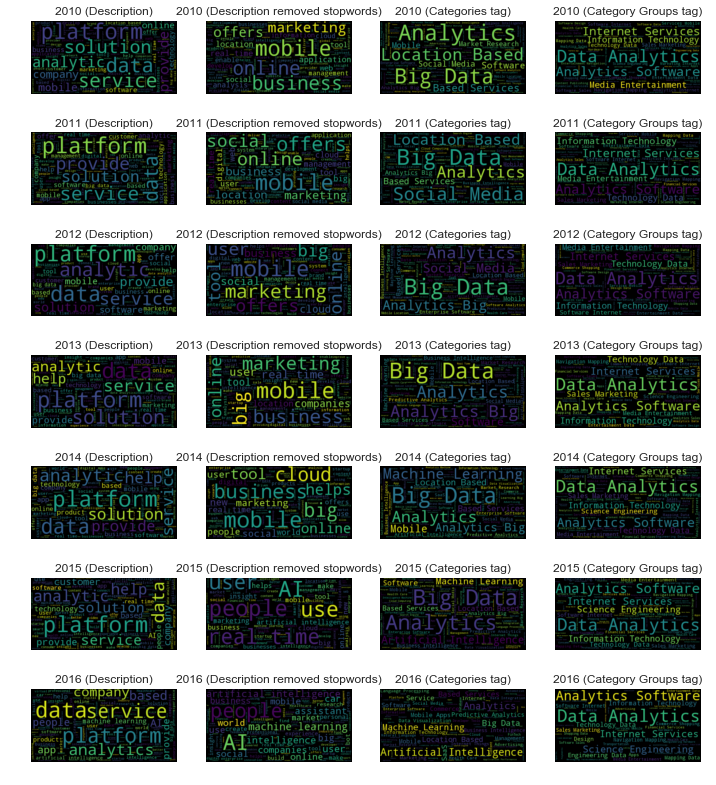

In [23]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union({'product', 'technology', 'data', 'company', 'customer', 'analytic', 
                             'platform', 'analytics', 'provide', 'service', 'solution', 'provides', 'offer', 'help',
                            'software', 'solutions', 'app', 'based', 'services'})
plt.figure(figsize=(12,14))
i = 1
for y in range(2010, 2017):
    text = ' '.join(list(cb_data_merged[cb_data_merged['Founded Year'] == y].Description.values))

    wordcloud = WordCloud(max_font_size=60).generate(text)
    plt.subplot(7, 4, i)    
    i+=1
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(y) + ' (Description)')
    
    wordcloud = WordCloud(max_font_size=60, stopwords=stopwords).generate(text)
    plt.subplot(7, 4, i)    
    i+=1
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(y)+' (Description removed stopwords)')
    
    text = ' '.join(list(cb_data_merged[cb_data_merged['Founded Year'] == y]['Categories'].values))
    wordcloud = WordCloud(max_font_size=60).generate(text)
    plt.subplot(7, 4, i)    
    i+=1
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(y) + ' (Categories tag)')
    
    text = ' '.join(list(cb_data_merged[cb_data_merged['Founded Year'] == y]['Category Groups'].values))
    wordcloud = WordCloud(max_font_size=60).generate(text)
    plt.subplot(7, 4, i)    
    i+=1
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(y) + ' (Category Groups tag)')
    
    #plt.show()

In [24]:
# cb_data_merged['time_to_acq'] = cb_data_merged['Acquired Year'] - cb_data_merged['Founded Year']
# tmp_df = cb_data_merged[['Company Name', 'Founded Year', 'Acquired Year', 'time_to_acq']]
# tmp_df = tmp_df.dropna(axis=0)
# g = sns.factorplot(x="Founded Year", y="time_to_acq", data=tmp_df,
#                    size=6, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("survival probability")
# tmp_df

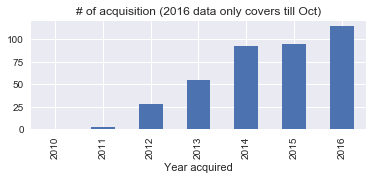

In [25]:
n_acq = cb_data_merged['Acquired Year'].value_counts(sort=False).sort_index()
n_acq.loc[[2010, 2011, 2012, 2013, 2014, 2015, 2016]].plot(kind='bar', figsize=(6,2))
plt.title('# of acquisition (2016 data only covers till Oct)')
plt.xlabel('Year acquired')

In [26]:
cb_data_merged

,Company Name,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Number of Articles,Total Equity Funding Amount,Total Funding Amount,Closed Date,...,Trend Score (30 Days),Trend Score (90 Days),Website,Founded Year,Transaction Name,Acquired Company Name,Acquiring Company Name,Announced On Date,Price,Acquired Year
0,Krux,"Media and Entertainment, Data and Analytics, S...","San Francisco, California, United States","Krux helps marketers, publishers and agencies ...",35,2010-01-01,91,"$50,000,000","$50,000,000",NaN,...,9.4,9.6,http://www.krux.com,2010,Salesforce acquires Krux,Krux,Salesforce,10/03/2016,"$700,000,000",2016.0
1,Datadog,"Information Technology, Data and Analytics, So...","New York, New York, United States",Datadog is the essential monitoring service fo...,374,2010-01-01,95,"$147,900,000","$147,900,000",NaN,...,-0.5,-1.3,http://datadog.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
2,Sumo Logic,"Data and Analytics, Software","Redwood City, California, United States","Sumo Logic, a log management and analytics ser...",407,2010-01-01,128,"$155,000,000","$155,000,000",NaN,...,-1.2,0.6,http://www.sumologic.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
3,Quid,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",Quid powers human intuition with machine intel...,709,2010-01-01,44,"$66,500,000","$66,500,000",NaN,...,-0.2,2.5,http://quid.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
4,Vicarious,"Media and Entertainment, Data and Analytics, S...","San Francisco, California, United States",Vicarious develops Recursive Cortical Network™...,718,2010-01-01,33,"$72,000,000","$72,000,000",NaN,...,-0.2,-1.4,http://vicarious.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
5,"Alteryx, Inc.","Information Technology, Data and Analytics, So...","Irvine, California, United States",Alteryx is the leader in self-service data ana...,814,2010-01-01,11,"$163,000,000","$163,000,000",NaN,...,0.3,3.1,http://alteryx.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
6,PlaceIQ,"Navigation and Mapping, Information Technology...","New York, New York, United States",PlaceIQ provides location intelligence service...,847,2010-01-01,100,"$51,950,000","$51,950,000",NaN,...,-2.8,-1.6,http://www.placeiq.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
7,Qubit,"Commerce and Shopping, Media and Entertainment...",NaN,Qubit gives marketers the tools to understand ...,883,2010-01-01,49,"$74,850,000","$74,850,000",NaN,...,-0.2,-0.3,http://www.qubit.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
8,Euclid Analytics,"Commerce and Shopping, Data and Analytics, Sof...","San Francisco, California, United States",Euclid Analytics is the world leader in locati...,"1,044",2010-01-01,37,"$43,600,000","$43,600,000",NaN,...,-0.1,-1.1,http://euclidanalytics.com,2010,NaN,NaN,NaN,NaN,NaN,NaN
9,Infer,"Information Technology, Data and Analytics, So...","Mountain View, California, United States",Infer provides a predictive SaaS platform that...,"1,147",2010-01-01,81,"$35,000,000","$35,000,000",NaN,...,-2.0,-0.9,http://www.infer.com,2010,NaN,NaN,NaN,NaN,NaN,NaN


# See how many company names end with .ai

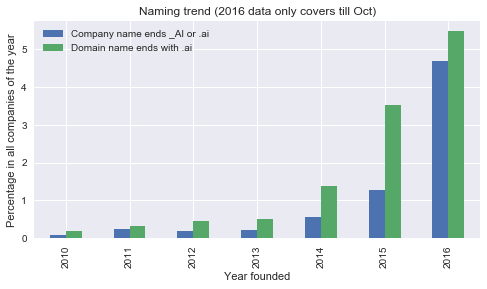

In [27]:
n_company = cb_data_merged['Founded Year'].value_counts().sort_index()
n_company.name = 'N company'

ai_names = cb_data_merged[cb_data_merged['Company Name'].str.endswith(' AI') | 
                          cb_data_merged['Company Name'].str.endswith('.ai')]['Founded Year'].value_counts(sort=False)
ai_names = ai_names / n_company *100
ai_names.name = 'Company name ends _AI or .ai'

ai_websites = cb_data_merged[cb_data_merged['Website'].str.endswith('.ai').fillna(False)]['Founded Year'].value_counts(sort=False)
ai_websites = ai_websites / n_company *100
ai_websites.name = 'Domain name ends with .ai'

io_websites = cb_data_merged[cb_data_merged['Website'].str.endswith('.io').fillna(False)]['Founded Year'].value_counts(sort=False)
io_websites = io_websites / n_company *100
io_websites.name = 'Domain name ends with .io'

#ai_df = pd.concat([ai_names, ai_websites, io_websites], axis=1)
ai_df = pd.concat([ai_names, ai_websites], axis=1)
ai_df.plot(kind='bar', figsize=(8,4))
plt.title('Naming trend (2016 data only covers till Oct)')
plt.xlabel('Year founded')
plt.ylabel('Percentage in all companies of the year')

# Angellist data

Data acquired throuhg web scraping see repo [here](https://github.com/dingran1019/angellist-webscrape)


In [91]:
angellist_data=pd.read_csv('angellist_data/results_so_far_2016-10-21.csv', index_col=0)
angellist_data['joined_year'] = angellist_data['joined_date'].apply(lambda x: int(x[:4]))
# extract year from date string
print(angellist_data.shape)
angellist_data.head(5)

(19187, 14)


,al_link,featured,joined_date,location,market,product_desc,raised,score,signal,size,stage,title,website,joined_year
0,https://angel.co/zimperium,&featured=Featured,2013-01-01,San Francisco,Enterprise Security,Zimperium develops Mobile Unified Threat Manag...,45000000.0,9,Signal4,51-200,Series C,ZIMPERIUM,https://www.zimperium.com,2013
1,https://angel.co/deckdaq,&featured=Featured,2013-03-01,Tel Aviv-Yafo,Mobile Games,DeckDAQ enables fans to collect and trade virt...,750000.0,9,Signal4,1-10,Seed,DeckDAQ,http://www.deckdaq.com,2013
2,https://angel.co/greenbox,&featured=Featured,2013-10-01,Tel Aviv-Yafo,Consumer Electronics,Greenbox brings the Internet of Things to the ...,250000.0,9,Signal4,1-10,NaN,Greenbox,http://www.greenboxhq.com,2013
3,https://angel.co/steply,&featured=Featured,2010-12-01,Hong Kong,Photo Sharing,Steply is a mobile photo app network that lets...,NaN,9,Signal4,-,-,Steply,http://steply.com/,2010
4,https://angel.co/ushi,&featured=Featured,2012-06-01,Shanghai,Professional Networking,Ushi is revolutionizing China's recruitment ma...,NaN,9,Signal4,-,-,Ushi,http://www.ushi.com,2012


In [92]:
print(angellist_data.shape)
angellist_data.dropna(subset=['product_desc'], inplace=True)
# want to make sure a company has a description for further analysis
print(angellist_data.shape)
angellist_data.dropna(subset=['title'], inplace=True)
# want to make sure a company has a description for further analysis
print(angellist_data.shape)

(19187, 14)
(13638, 14)
(13637, 14)


In [93]:
print(angellist_data.shape)
angellist_data = angellist_data.drop_duplicates(subset=['title', 'website'])
# consider a company a duplicate of both company name (title) and website are the same
print(angellist_data.shape)

(13637, 14)
(12519, 14)


In [95]:
# check if we have duplicated name if so append '-2', '-3' and so on
for i in range(3):
    print(len(angellist_data.title) - len(angellist_data.title.unique()))  #see how many duplicated titles
    idx = angellist_data.title.duplicated()
    angellist_data.loc[idx, 'title'] = angellist_data.loc[idx, 'title'] + '-' + str(i+2)
print(angellist_data.shape)
#print(angellist_data[angellist_data.title.str.endswith('-3')].title)

assert 0 == len(angellist_data.title) - len(angellist_data.title.unique())

0
0
0
(12519, 14)


In [96]:
len(angellist_data.market.unique())

860

In [104]:
angellist_data = angellist_data.reset_index()
angellist_data.index

RangeIndex(start=0, stop=12519, step=1)

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(input='content', 
                    encoding='utf-8', decode_error='replace', strip_accents='unicode', 
                    lowercase=True, analyzer='word', stop_words='english', 
                    ngram_range=(1, 2), max_features = 10000, 
                    norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True,
                    max_df=1.0, min_df=1)

In [99]:
corpus = angellist_data.product_desc
v.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='replace',
        dtype=<type 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [138]:
X = v.transform(corpus)
#print(v.vocabulary_)
print(X.shape)

(12519, 10000)


In [125]:
# calculate siimlarity based on tfidf vector of the company description
try:
    X = X.todense() # originally it's a sparse matrix
except:
    pass
sim_dict = {}
N_sim = 10
batch_size = 200
for i in tqdm(range(0,len(angellist_data),batch_size)):
    i1 = min(len(angellist_data), i+batch_size)
    xquery = X[i:i1] # BxD
    ds = -np.asarray(np.dot(X, xquery.T)) #NxD * DxB => NxB
    IX = np.argsort(ds, axis=0) # NxB
    for j in range(i1-i):
        sim_dict[angellist_data.loc[i+j, 'title']] = [(angellist_data.loc[q, 'title'], ds[q,j]) for q in list(IX[:N_sim,j])]

100%|██████████| 63/63 [00:54<00:00,  1.33it/s]


In [184]:
for i in sim_dict['Fitocracy']:
    print(i)
    print(angellist_data[angellist_data['title']==i[0]].product_desc.values)

('Fitocracy', -1.0)
[ 'Fitocracy is a marketplace that brings mobile personal training to a huge audience at low cost. By operating online, we make it supremely easy for trainers to add new revenue streams while only costing ~$50/month for the customer.']
('Tugboat Yards', -0.26976055042292046)
[ 'Tugboat helps digital publishers find their true fans, establish new revenue streams and foster meaningful relationships with their supporters.']
('Fitspot', -0.24936535096135792)
[ 'Fitspot is a mobile app that sends personal trainers to you for a flat rate of $59. Training sessions can take place at home, a park or a partnering gym. Fitspot offers 6 genres of fitness: personal training, crossfit, boxing, yoga, pilates and stretching.']
('SoshiGames', -0.24443090775703843)
[ 'Music Festivals creates new revenue streams for the music industry from the sale of virtual goods and music tracks and also generates discovery for new artists. Longer term, it will provide a platform to scale across ot

In [181]:
from __future__ import print_function
import colorama
import datetime
from bs4 import BeautifulSoup
import random
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.common.exceptions import TimeoutException
from random import shuffle
colorama.init()

In [179]:
def set_pause(kind=1, t=None):
    log_time('info')
    if t is not None:
        kind_str = 'specific'
    else:
        if kind == 5:
            kind_str = 'ultra long'
            t = calc_pause(base_seconds=1000, variable_seconds=1000)
        elif kind == 4:
            kind_str = 'very long'
            t = calc_pause(base_seconds=100, variable_seconds=100)
        elif kind == 3:
            kind_str = 'long'
            t = calc_pause(base_seconds=10, variable_seconds=10)
        elif kind == 2:
            kind_str = 'short'
            t = calc_pause(base_seconds=3., variable_seconds=3.)
        else:
            kind_str = 'very short'
            t = calc_pause(base_seconds=0.5, variable_seconds=0.5)

    print('{} pause: {}s...'.format(kind_str, t))

    time.sleep(t)

def log_time(kind='general', color_str=None):
    if color_str is None:
        if kind == 'error' or kind.startswith('e'):
            color_str = colorama.Fore.RED
        elif kind == 'info' or kind.startswith('i'):
            color_str = colorama.Fore.YELLOW
        elif kind == 'overwrite' or kind.startswith('o'):
            color_str = colorama.Fore.MAGENTA
        elif kind == 'write' or kind.startswith('w'):
            color_str = colorama.Fore.CYAN
        elif kind == 'highlight' or kind.startswith('h'):
            color_str = colorama.Fore.GREEN
        else:
            color_str = colorama.Fore.WHITE

    print(color_str + str(datetime.datetime.now()) + colorama.Fore.RESET, end=' ')

def init_driver(driver_type='Chrome'):
    log_time('info')
    print('initiating driver: {}'.format(driver_type))
    if driver_type == 'Chrome':
        dr = webdriver.Chrome()
    elif driver_type.startswith('Pha'):
        dr = webdriver.PhantomJS()
    elif driver_type.startswith('Fi'):
        dr = webdriver.Firefox()
    else:
        assert False
    dr.set_window_size(1920, 600)
    dr.wait = WebDriverWait(dr, 5)
    dr.set_page_load_timeout(25)
    return dr


def quit_driver(dr):
    log_time('info')
    print('closing driver...')
    dr.quit()


def load_url(driver=None, url=None, n_attempts_limit=3):
    """
    page loader with n_attempts
    :param driver: 
    :param url: 
    :param n_attempts_limit: 
    :return: 
    """
    n_attempts = 0
    page_loaded = False
    while n_attempts < n_attempts_limit and not page_loaded:
        try:
            driver.get(url)
            page_loaded = True
            log_time()
            print('page loaded successfully: {}'.format(url))
        except TimeoutException:
            n_attempts += 1
            log_time('error')
            print('loading page timeout', url, 'attempt {}'.format(n_attempts))
            set_pause(1)
        except:
            n_attempts += 1
            log_time('error')
            print('loading page unknown error', url, 'attempt {}'.format(n_attempts))
            set_pause(1)

    if n_attempts == n_attempts_limit:
        driver.quit()
        log_time('error')
        print('loading page failed after {} attempts, now give up:'.format(n_attempts_limit), url)
        return False

    return True

In [180]:
company_list = list(angellist_data.title.values)
company_list_file = 'company_list.txt'
with open(company_list_file, 'w') as f:
    for c in company_list:
        f.write("%s\n" % c)    

In [182]:
shuffle(company_list)
for c in tqdm(company_list):
    print(c)
    google_str = ''
    fname = os.path.join('google_text', '{}_CB.txt'.format(c))
    if os.path.exists(fname):
        print('company exists, skip')
    else:
        driver = init_driver()
        target_url = 'https://www.google.com/search?q={}%20crunchbase'.format(c)
        load_url(driver=driver, url=target_url)
        page = driver.page_source
        quit_driver(driver)
        soup = BeautifulSoup(page, 'lxml')
        text = soup.findAll('span', {'class': 'st'})[0].get_text()
        print(text)
        with open(fname, 'w') as f:
            if isinstance(text, unicode):
                f.write(text.encode('utf-8'))
            else:
                f.write(text)


  0%|          | 0/12519 [00:00<?, ?it/s]

Drizly
2017-07-05 16:58:24.978961 initiating driver: Chrome




  0%|          | 1/12519 [00:04<15:36:47,  4.49s/it]

2017-07-05 16:58:29.310281 page loaded successfully: https://www.google.com/search?q=Drizly%20crunchbase
2017-07-05 16:58:29.344724 closing driver...
Drizly is the technology company transforming the way alcohol is shopped, sold and shared online.
Bluebox
2017-07-05 16:58:29.469157 initiating driver: Chrome


2017-07-05 16:58:33.370017 page loaded successfully: https://www.google.com/search?q=Bluebox%20crunchbase
2017-07-05 16:58:33.421769 closing driver...



  0%|          | 2/12519 [00:08<15:16:49,  4.39s/it]

Bluebox Security is saving the corporate world from information thievery by securing company data as it interacts with employee-owned mobile devices, ...
StudioNow
2017-07-05 16:58:33.649844 initiating driver: Chrome



  0%|          | 3/12519 [00:14<16:16:26,  4.68s/it]

2017-07-05 16:58:38.834716 page loaded successfully: https://www.google.com/search?q=StudioNow%20crunchbase
2017-07-05 16:58:38.865709 closing driver...
StudioNow helps companies create, manage and syndicate online videos with customized workflows and their proprietary technology.
Sociable  Labs
2017-07-05 16:58:38.990747 initiating driver: Chrome



  0%|          | 4/12519 [00:18<16:24:17,  4.72s/it]

2017-07-05 16:58:43.646239 page loaded successfully: https://www.google.com/search?q=Sociable  Labs%20crunchbase
2017-07-05 16:58:43.678699 closing driver...
Sociable Labs is a SAAS provider of social and viral marketing solutions.
Music Dealers
2017-07-05 16:58:43.797762 initiating driver: Chrome


2017-07-05 16:58:47.814861 page loaded successfully: https://www.google.com/search?q=Music Dealers%20crunchbase



  0%|          | 5/12519 [00:23<16:26:28,  4.73s/it]

2017-07-05 16:58:48.370710 closing driver...
Music Dealers is a music licensing platform providing pre-cleared music and custom song creation for content creators.
TribeHR
2017-07-05 16:58:48.554356 initiating driver: Chrome


2017-07-05 16:58:51.899705 page loaded successfully: https://www.google.com/search?q=TribeHR%20crunchbase
2017-07-05 16:58:51.981909 closing driver...



  0%|          | 6/12519 [00:27<15:20:01,  4.41s/it]

TribeHR is online human resources software that helps small and medium-sized businesses simplify their HR management challenges.
NatureBox
2017-07-05 16:58:52.222169 initiating driver: Chrome



  0%|          | 7/12519 [00:32<16:08:39,  4.65s/it]

2017-07-05 16:58:57.244218 page loaded successfully: https://www.google.com/search?q=NatureBox%20crunchbase
2017-07-05 16:58:57.288530 closing driver...
NatureBox is building a personalized food shopping experience online that caters to the consumer's taste and dietary preferences. NatureBox is initially focusing ...
waygum.io
2017-07-05 16:58:57.412133 initiating driver: Chrome


2017-07-05 16:59:02.402956 page loaded successfully: https://www.google.com/search?q=waygum.io%20crunchbase
2017-07-05 16:59:02.438656 closing driver...



  0%|          | 8/12519 [00:37<16:45:12,  4.82s/it]

We maximize manufacturing uptime, by using intelligent mobile workflows and mobile remote monitoring. ... Mobile, Internet of Things. ... Waygum is a Mobile App Platform that delivers the last mile mobile layer for your IOIT.
inCrowd loyalty
2017-07-05 16:59:02.644083 initiating driver: Chrome



  0%|          | 9/12519 [00:42<16:51:18,  4.85s/it]

2017-07-05 16:59:07.374916 page loaded successfully: https://www.google.com/search?q=inCrowd loyalty%20crunchbase
2017-07-05 16:59:07.430860 closing driver...
Provides the Life Science Industry with on demand access to profiled and vetted medical experts to answer pressing business questions.
Mediamind
2017-07-05 16:59:07.562175 initiating driver: Chrome



  0%|          | 10/12519 [00:48<17:29:53,  5.04s/it]

2017-07-05 16:59:12.856660 page loaded successfully: https://www.google.com/search?q=Mediamind%20crunchbase
2017-07-05 16:59:12.900974 closing driver...
The MediaMind campaign management platform helps advertisers and agencies to deploy and optimize their advertising budgets across multiple.
Coderloop
2017-07-05 16:59:13.030816 initiating driver: Chrome


2017-07-05 16:59:18.703486 page loaded successfully: https://www.google.com/search?q=Coderloop%20crunchbase
2017-07-05 16:59:18.763758 closing driver...



  0%|          | 11/12519 [00:53<18:24:39,  5.30s/it]

Coderloop provides real-time testing services that enable employers and recruiters to assess the IT skills of their employees.
Lighter Capital
2017-07-05 16:59:18.944065 initiating driver: Chrome


2017-07-05 16:59:24.475601 page loaded successfully: https://www.google.com/search?q=Lighter Capital%20crunchbase



  0%|          | 12/12519 [00:59<19:09:24,  5.51s/it]

2017-07-05 16:59:24.780895 closing driver...
Lighter Capital is reinventing how small businesses get capital for growth, filling the gap between VCs and banks.
Slidely
2017-07-05 16:59:24.960266 initiating driver: Chrome


2017-07-05 16:59:30.511816 page loaded successfully: https://www.google.com/search?q=Slidely%20crunchbase
2017-07-05 16:59:30.552929 closing driver...
Slidely is a social video creation platform that enables people, brands, and publishers to get creative with their visual storytelling.



  0%|          | 13/12519 [01:05<19:24:23,  5.59s/it]

Dreamit
2017-07-05 16:59:30.715686 initiating driver: Chrome
2017-07-05 16:59:35.805381 page loaded successfully: https://www.google.com/search?q=Dreamit%20crunchbase
2017-07-05 16:59:35.849885 closing driver...



  0%|          | 14/12519 [01:13<21:09:26,  6.09s/it]

Dreamit is an accelerator program for UrbanTech and digital health startups with a product ready to deploy and some early traction. The 14 week cycle is 5 ...
Curiosityville
2017-07-05 16:59:37.983568 initiating driver: Chrome


2017-07-05 16:59:44.225537 page loaded successfully: https://www.google.com/search?q=Curiosityville%20crunchbase
2017-07-05 16:59:44.286911 closing driver...



  0%|          | 15/12519 [01:19<21:42:43,  6.25s/it]

Curiosityville is a personalized learning website with activities and games for children and their families.
Boomf
company exists, skip
KUKIMI
2017-07-05 16:59:44.616473 initiating driver: Chrome


2017-07-05 16:59:52.395065 page loaded successfully: https://www.google.com/search?q=KUKIMI%20crunchbase
2017-07-05 16:59:52.439056 closing driver...



  0%|          | 17/12519 [01:27<19:24:39,  5.59s/it]

KUKIMI is a diet program that delivers a variety of healthy meals directly to its users' homes or offices.
MileIQ
2017-07-05 16:59:52.699816 initiating driver: Chrome


2017-07-05 16:59:59.594378 page loaded successfully: https://www.google.com/search?q=MileIQ%20crunchbase
2017-07-05 16:59:59.651957 closing driver...



  0%|          | 18/12519 [01:34<21:04:58,  6.07s/it]

MileIQ uses smart drive-detection technology to automatically log your drives and calculate their value. You get the reimbursement or deduction you deserve ...
HeTexted
2017-07-05 16:59:59.897025 initiating driver: Chrome


2017-07-05 17:00:07.378520 page loaded successfully: https://www.google.com/search?q=HeTexted%20crunchbase
2017-07-05 17:00:07.431299 closing driver...



  0%|          | 19/12519 [01:42<22:57:48,  6.61s/it]

HeTexted is a vertical advising platform providing suggestions about dating and relationships.
Endochoice
2017-07-05 17:00:07.774104 initiating driver: Chrome


2017-07-05 17:00:14.656705 page loaded successfully: https://www.google.com/search?q=Endochoice%20crunchbase
2017-07-05 17:00:14.708631 closing driver...



  0%|          | 20/12519 [01:50<23:48:20,  6.86s/it]

EndoChoice, a platform-technology firm, provides devices, diagnostics and infection control for treating gastrointestinal diseases.
Total Eclipse
2017-07-05 17:00:15.198268 initiating driver: Chrome


2017-07-05 17:00:20.638291 page loaded successfully: https://www.google.com/search?q=Total Eclipse%20crunchbase
2017-07-05 17:00:20.791325 closing driver...



  0%|          | 21/12519 [01:55<22:38:13,  6.52s/it]

At Total Eclipse we love crafting memorable experiences for our players. Our current focus is on creating fun and innovative casual games that are easy to learn ...
CARD.COM
2017-07-05 17:00:20.934189 initiating driver: Chrome


2017-07-05 17:00:25.906182 page loaded successfully: https://www.google.com/search?q=CARD.COM%20crunchbase
2017-07-05 17:00:25.986613 closing driver...



  0%|          | 22/12519 [02:01<21:25:03,  6.17s/it]

CARD.com creates fashionable and simple payments solutions for its members.
Consumerbell
2017-07-05 17:00:26.298627 initiating driver: Chrome


2017-07-05 17:00:32.019221 page loaded successfully: https://www.google.com/search?q=Consumerbell%20crunchbase
2017-07-05 17:00:32.060073 closing driver...



  0%|          | 23/12519 [02:07<21:15:50,  6.13s/it]

ConsumerBell offers an online tool for companies to manage the product recall process online.
Truvie Security
2017-07-05 17:00:32.310297 initiating driver: Chrome


2017-07-05 17:00:38.900624 page loaded successfully: https://www.google.com/search?q=Truvie Security%20crunchbase
2017-07-05 17:00:38.951608 closing driver...



  0%|          | 24/12519 [02:14<22:11:36,  6.39s/it]

Categories: Security, Banking, Financial Services, Finance. Symantec · Categories: Cyber Security, Security, Computer. HSBC · Categories: Security, Banking ...
Vitulum Ventures
2017-07-05 17:00:39.332774 initiating driver: Chrome


2017-07-05 17:00:46.720741 page loaded successfully: https://www.google.com/search?q=Vitulum Ventures%20crunchbase
2017-07-05 17:00:46.767249 closing driver...



  0%|          | 25/12519 [02:22<23:34:52,  6.79s/it]

We invest our own money, which makes us different from Venture Capitalists. Another important aspect is the level of involvement.
Nokia
2017-07-05 17:00:47.058927 initiating driver: Chrome


2017-07-05 17:00:55.568959 page loaded successfully: https://www.google.com/search?q=Nokia%20crunchbase
2017-07-05 17:00:55.681479 closing driver...



  0%|          | 26/12519 [02:31<26:00:14,  7.49s/it]

Nokia, a Finnish multinational communications corporation engaged in the manufacturing of mobile devices, network infrastructure, and more.
Yo
2017-07-05 17:00:56.182521 initiating driver: Chrome


2017-07-05 17:01:05.293677 page loaded successfully: https://www.google.com/search?q=Yo%20crunchbase
2017-07-05 17:01:05.343638 closing driver...



  0%|          | 27/12519 [02:40<28:05:52,  8.10s/it]

Yo is a single-tap zero character communication tool.
Newvoicemedia
2017-07-05 17:01:05.694789 initiating driver: Chrome


2017-07-05 17:01:13.651258 page loaded successfully: https://www.google.com/search?q=Newvoicemedia%20crunchbase
2017-07-05 17:01:13.697057 closing driver...



  0%|          | 28/12519 [02:48<28:17:13,  8.15s/it]

NewVoiceMedia is a leading global provider of cloud technology which helps businesses sell more, serve better and grow faster.
Traffio
2017-07-05 17:01:13.976329 initiating driver: Chrome


2017-07-05 17:01:21.387108 page loaded successfully: https://www.google.com/search?q=Traffio%20crunchbase
2017-07-05 17:01:21.805647 closing driver...



  0%|          | 29/12519 [02:57<28:28:19,  8.21s/it]

Traffio creates a gamified advertising platform to deliver real-time conversions through interactive game-based engagement. ... Traffio is creating the world's first gamified advertising platform for the new web. ... Today, they work with leading e-commerce brands to deliver real-time ...
Appodeal
2017-07-05 17:01:22.302837 initiating driver: Chrome


2017-07-05 17:01:28.976922 page loaded successfully: https://www.google.com/search?q=Appodeal%20crunchbase
2017-07-05 17:01:30.372057 closing driver...



  0%|          | 30/12519 [03:05<28:53:47,  8.33s/it]

Leading publisher centric app monetization platform.
Highlight
2017-07-05 17:01:30.923295 initiating driver: Chrome


2017-07-05 17:01:40.392370 page loaded successfully: https://www.google.com/search?q=Highlight%20crunchbase
2017-07-05 17:01:40.519070 closing driver...



  0%|          | 31/12519 [03:15<30:27:49,  8.78s/it]

Highlight is a mobile ambient awareness app. When you come within a few blocks of another Highlight user who is your Facebook friend or that you have friends ...
Caliber
2017-07-05 17:01:40.757857 initiating driver: Chrome


2017-07-05 17:01:49.195833 page loaded successfully: https://www.google.com/search?q=Caliber%20crunchbase
2017-07-05 17:01:49.672227 closing driver...



  0%|          | 32/12519 [03:25<31:07:50,  8.98s/it]

Caliber connects with the right professionals, find a job, unlock career opportunities, prosper, progress and profit.
Crowdly
2017-07-05 17:01:50.189081 initiating driver: Chrome


2017-07-05 17:01:58.222371 page loaded successfully: https://www.google.com/search?q=Crowdly%20crunchbase
2017-07-05 17:01:58.520076 closing driver...



  0%|          | 33/12519 [03:34<31:05:54,  8.97s/it]

Crowdly, a social advocate management platform, helps brands find, rank and engage their top advocates on Facebook.
Bright.md
2017-07-05 17:01:59.131525 initiating driver: Chrome


2017-07-05 17:02:07.082693 page loaded successfully: https://www.google.com/search?q=Bright.md%20crunchbase
2017-07-05 17:02:07.270189 closing driver...



  0%|          | 34/12519 [03:42<30:40:55,  8.85s/it]

Bright.md builds software that cuts the cost of healthcare visits by up to 80%.
Instigate
2017-07-05 17:02:07.703971 initiating driver: Chrome


2017-07-05 17:02:16.361434 page loaded successfully: https://www.google.com/search?q=Instigate%20crunchbase
2017-07-05 17:02:16.413227 closing driver...



  0%|          | 35/12519 [03:51<30:58:55,  8.93s/it]

Description: Authoring and Playback system for Personal Bots; Website: http://instigate.ai; Social: Company Details. Update. Founded: June 1, 2016; Employees: ...
MentAd
2017-07-05 17:02:16.835543 initiating driver: Chrome


2017-07-05 17:02:22.388274 page loaded successfully: https://www.google.com/search?q=MentAd%20crunchbase
2017-07-05 17:02:22.431975 closing driver...



  0%|          | 36/12519 [03:57<27:49:14,  8.02s/it]

MentAd, a predictive marketing platform, acquiries new customers and increase conversions for e-commerce and lead generation.
BlueCrew
2017-07-05 17:02:22.733254 initiating driver: Chrome


2017-07-05 17:02:29.981511 page loaded successfully: https://www.google.com/search?q=BlueCrew%20crunchbase
2017-07-05 17:02:30.023116 closing driver...



  0%|          | 37/12519 [04:05<27:34:19,  7.95s/it]

BlueCrew is an on-demand staffing platform for temporary workers. We are looking to change the future of work by adding transparency and automation to the ...
GAIN Fitness
2017-07-05 17:02:30.521539 initiating driver: Chrome


2017-07-05 17:02:38.280635 page loaded successfully: https://www.google.com/search?q=GAIN Fitness%20crunchbase
2017-07-05 17:02:39.152399 closing driver...



  0%|          | 38/12519 [04:14<28:42:47,  8.28s/it]

GAIN Fitness offers web and mobile apps that generate personalized training plans for regular exercisers.
Constant Insight
2017-07-05 17:02:39.571020 initiating driver: Chrome


2017-07-05 17:02:46.838644 page loaded successfully: https://www.google.com/search?q=Constant Insight%20crunchbase
2017-07-05 17:02:46.886493 closing driver...



  0%|          | 39/12519 [04:25<31:04:23,  8.96s/it]

Constant Insight is a people intelligence platform that uses email addresses to locate demographic, social, work, and economic information.
Skyword
2017-07-05 17:02:50.125407 initiating driver: Chrome


2017-07-05 17:02:58.784069 page loaded successfully: https://www.google.com/search?q=Skyword%20crunchbase
2017-07-05 17:02:58.927607 closing driver...



  0%|          | 40/12519 [04:34<31:09:48,  8.99s/it]

Skyward is the first operations management solution for commercial drone businesses.
RNA Networks
2017-07-05 17:02:59.183070 initiating driver: Chrome


2017-07-05 17:03:07.358831 page loaded successfully: https://www.google.com/search?q=RNA Networks%20crunchbase
2017-07-05 17:03:07.439608 closing driver...



  0%|          | 41/12519 [04:42<30:42:11,  8.86s/it]

RNA Networks offers a memory virtualization platform that makes memory a shared resource and accelerates the speed of a business.
Ticketleap
2017-07-05 17:03:07.726694 initiating driver: Chrome


2017-07-05 17:03:16.097396 page loaded successfully: https://www.google.com/search?q=Ticketleap%20crunchbase
2017-07-05 17:03:16.371307 closing driver...



  0%|          | 42/12519 [04:51<31:01:14,  8.95s/it]

TicketLeap is an online ticketing platform enabling event organizers to sell, market and manage their events in one place.
Castle
2017-07-05 17:03:16.894703 initiating driver: Chrome


2017-07-05 17:03:26.551193 page loaded successfully: https://www.google.com/search?q=Castle%20crunchbase
2017-07-05 17:03:26.593703 closing driver...



  0%|          | 43/12519 [05:02<32:28:31,  9.37s/it]

Castle manages rental homes for landlords using automation and on-demand labor.
Protocol Labs
2017-07-05 17:03:27.245848 initiating driver: Chrome


2017-07-05 17:03:37.729484 page loaded successfully: https://www.google.com/search?q=Protocol Labs%20crunchbase
2017-07-05 17:03:37.809997 closing driver...



  0%|          | 44/12519 [05:13<34:02:49,  9.83s/it]

We believe the internet has become humanity's most important technology. We build protocols, systems, and tools to improve how it works.
Adbrain
2017-07-05 17:03:38.131508 initiating driver: Chrome


KeyboardInterrupt: 

u'Fitocracy is an online fitness community offering games and social networking tools that help members improve their fitness.'

In [ ]:
# stopwords = set(STOPWORDS)
# stopwords = stopwords.union({'product', 'technology', 'data', 'company', 'customer', 'analytic', 
#                              'platform', 'analytics', 'provide', 'service', 'solution', 'provides', 'offer', 'help',
#                             'software', 'solutions', 'app', 'based', 'services'})

# plt.figure(figsize(6,14))
# i = 1
# for y in range(2010, 2017):
#     text = ' '.join(list(angellist_data[angellist_data['joined_year'] == y].product_desc.values.astype(str)))
#     wordcloud = WordCloud(max_font_size=60).generate(text)
#     plt.subplot(7, 2, i)    
#     i+=1
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(str(y) + ' (Description)')
    
#     wordcloud = WordCloud(max_font_size=60, stopwords=stopwords).generate(text)
#     plt.subplot(7, 2, i)    
#     i+=1
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(str(y)+' (Description removed stopwords)')
    
#     #plt.show()

In [ ]:
kickstart_data=pd.read_csv('kickstarter_data/proj_list_tech_top200pages_full.csv')
kickstart_data.dropna(subset=['description', 'end_date'], inplace=True)
kickstart_data['year'] = kickstart_data['end_date'].apply(lambda x: int(x[:4])) # extract year from date string
print(kickstart_data.shape)
kickstart_data.head()

In [ ]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union({'product', 'technology', 'data', 'company', 'customer', 'analytic', 
                             'platform', 'analytics', 'provide', 'service', 'solution', 'provides', 'offer', 'help',
                            'software', 'solutions', 'app', 'based', 'services'})

plt.figure(figsize(6,14))
i = 1
for y in range(kickstart_data.year.min(), kickstart_data.year.max()):
    text = ' '.join(list(kickstart_data[kickstart_data['year'] == y].description.values.astype(str)))
    wordcloud = WordCloud(max_font_size=60).generate(text)
    plt.subplot(7, 2, i)    
    i+=1
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(y) + ' (Description)')
    
    wordcloud = WordCloud(max_font_size=60, stopwords=stopwords).generate(text)
    plt.subplot(7, 2, i)    
    i+=1
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(y)+' (Description removed stopwords)')
    
    plt.show()

In [ ]:
df_dict = dict()
df_dict['cb'] = cb_data_merged
# df_dict['cb_acq'] = acq_df
df_dict['ks'] = kickstart_data
df_dict['al'] = angellist_data

In [ ]:
for key, item in df_dict.iteritems():
    print key, item.shape
    print item.columns

In [ ]:
df_dict['ks']['data_source'] = 'kickstarter'
df_dict['ks'].rename(columns={'description':'description', 'title': 'company_name'},inplace=True)

df_dict['cb']['data_source'] = 'crunchbase'
df_dict['cb'].rename(columns={'Description':'description', 'Company Name': 'company_name'},inplace=True)
df_dict['cb']['acquired'] = df_dict['cb']['Acquired Company Name'].notnull().astype(int)

df_dict['al']['data_source'] = 'angellist'
df_dict['al'].rename(columns={'product_desc':'description', 'title': 'company_name'},inplace=True)
df_dict['al']['acquired'] = (df_dict['al']['stage']=='Acquired').astype(int)

In [ ]:
for key, item in df_dict.iteritems():
    print key, item.shape
    print item.columns

In [ ]:
merge_data=pd.concat([x for _, x in df_dict.iteritems()], ignore_index=True)
print merge_data.shape
merge_data.drop_duplicates(subset=['company_name'], inplace=True)
print merge_data.shape

In [ ]:
merge_data.data_source.value_counts()

In [ ]:
print merge_data.columns

In [ ]:
merge_data_select = merge_data[['company_name', 'description', 'data_source', 'acquired']]

In [ ]:
#merge_data_select[merge_data_select['company_name']=='The']
merge_data_select = merge_data_select[(merge_data_select.data_source=='crunchbase') | (merge_data_select.data_source=='angellist')]

In [ ]:
#merge_data_select.company_name.value_counts()
merge_data_select = merge_data_select.drop_duplicates()
merge_data_select['description']=merge_data_select['description'].str.replace('\n',' ')
# merge_data['Description']=merge_data['Description'].str.replace('\\',' ')

merge_data_select=merge_data_select.dropna(subset=['description'])


In [ ]:
merge_data_select

In [ ]:
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
import sys
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords


token_pattern = re.compile(r"(?u)\b\w\w+\b")
stop_list=stopwords.words('english')+['help','new', 'way', 'world', 'make', 'people']

import itertools
palette = itertools.cycle(sns.hls_palette(15))
markers= itertools.cycle(['x','o','v','^','<','s'])


def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in token_pattern.findall(doc)]
    
def plot_top_words(model, feature_names, topic_idx, n_top_words=10):
#     for topic_idx, topic in enumerate(model.components_):
    topic=normalize(model.components_[topic_idx].reshape(1,-1))[0]
    sorted_idx=topic.argsort()[:-n_top_words - 1:-1]
    print("Topic #%d:" % topic_idx)
    features=[feature_names[i] for i in sorted_idx]
    print(" ".join(features))
    ax = sns.barplot(x=range(10),y=topic[sorted_idx])
    feature_id=0
    height= max(topic[sorted_idx])*0.6

    for p in ax.patches:
        ax.text(p.get_x()+0.15, height-0.1, '{}'.format(features[feature_id]))
        feature_id+=1

def plot_cluster(model, features, tsne_features, feature_names, nmf_model):
    """
    model: the clustering model. model.labels_ should contain the clusting label
    features: feature vectors used to compute the clustering centroid
    tsne_features: feature vectors for plot with tsne
    """
    cluster_labels=model.labels_
    n_top_words=10
    num_clusters=max(cluster_labels)+1
    cluster_name=[]
    # plotting
    # sample 2000 data points for scattering plot
    sample_for_plt, label_for_plt=resample(tsne_features,cluster_labels,n_samples=2000,random_state=0)
    mapping = TSNE(n_components=2,init='random', random_state=0, n_iter=2000, verbose=0, learning_rate=100, perplexity=20)
    embed=mapping.fit_transform(sample_for_plt)
    fig=figure(figsize=(15,7))
    # plot the clusters
    subplot(1,2,1)
    for i in range(num_clusters):
        subgroup=embed[label_for_plt==i,:]
        scatter(subgroup[:,0],subgroup[:,1],s=15, color=next(palette), marker=next(markers), label='{}'.format(i))
    legend()
    # plot the histgram of the clusters 
    subplot(1,2,2)
    hist(cluster_labels)
    # print out the cluster centers
    fig=figure(figsize=(15,10))
    for i in range(max(cluster_labels)+1):
        cluster=features[cluster_labels==i,:]
        centroid=np.mean(cluster,axis=0)
        centroid_feature=centroid.dot(nmf_model.components_)
        sorted_idx=centroid_feature.argsort()[:-n_top_words - 1:-1]
        c_name=' '.join([feature_names[j] for j in sorted_idx[:3]])
        cluster_name.append(c_name)
        subplot(num_clusters,1,i+1)
        ax = sns.barplot(x=range(10),y=centroid_feature[sorted_idx])
        top_words=[feature_names[j] for j in sorted_idx]
        word_id=0
        height= max(centroid_feature[sorted_idx])*0.6
        for p in ax.patches:
            ax.text(p.get_x()+0.15, height, '{}'.format(top_words[word_id]))
            word_id+=1
    return cluster_name

def print_cluster_member(model, cluster_id, data, num_samples=10):
    cluster_member=data.iloc[model.labels_==cluster_id]
    print 'number of companies in this class:', len(cluster_member)
    for m in cluster_member.head(num_samples).iterrows():
        print 'company ID:', m[0]
        print m[1]['Description']

def cluster_companies(df_data, description_column_name, num_clusters):
    """
    df_data: company dataframe
    description_column_name: column name of the dataframe corresponding to company description
    num_clusters: number of clusters 
    """
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2,
                                       max_features=3000,
                                       tokenizer=LemmaTokenizer(),
                                       stop_words=stop_list)
    tfidf = tfidf_vectorizer.fit_transform(df_data[description_column_name])
    nmf = NMF(n_components=15, random_state=1, 
              alpha=.1, l1_ratio=.2, max_iter=5000).fit(tfidf)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    topic_feature=nmf.transform(tfidf)
    topic_feature_norm=normalize(topic_feature)
    agg= AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    agg.fit(topic_feature_norm)
    df_data['cluster_id']=agg.labels_
    cluster_name= plot_cluster(agg, topic_feature, topic_feature_norm, tfidf_feature_names, nmf)
    df_data['cluster_name']= df_data['cluster_id'].apply(lambda x: cluster_name[x])

In [ ]:
cluster_companies(df_data=merge_data_select, description_column_name='description', num_clusters=10)

In [ ]:
merge_data_select.columns

In [ ]:
merge_data_select

In [ ]:
df1 = merge_data_select.groupby('cluster_name')['acquired'].sum()
#df1['count'] = merge_data_select.groupby('cluster_name').count()

In [ ]:
df1

In [ ]:
df2 = merge_data_select.groupby('cluster_name')['acquired'].count()

In [ ]:
print df2

In [ ]:
acq_ratio = (df1/df2)*100

In [ ]:
print acq_ratio